In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
data = iris.data
target = iris.target

In [4]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
cond = (target != 2)

In [7]:
data = data[cond]
target = target[cond]

In [8]:
data.shape

(100, 4)

In [9]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
# 获取混淆矩阵, 计算各种评估指标.
from sklearn.metrics import confusion_matrix

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_ = logistic.predict(X_test)

In [16]:
# 因为鸢尾花数据,效果太好了,全对.
confusion_matrix(y_test, y_)

array([[15,  0],
       [ 0, 15]], dtype=int64)

In [17]:
# 因为特征太好, 我们加点噪声, 让特征别那么好, 加点噪声特征.
X = np.hstack((data, np.random.randn(100, 800)))


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3)

In [19]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_ = logistic.predict(X_test)

In [38]:
# predict_proba得到预测的概率
y_proba = logistic.predict_proba(X_test)

In [20]:
confusion_matrix(y_test, y_)

array([[10,  4],
       [ 1, 15]], dtype=int64)

In [21]:
# 交叉表
pd.crosstab(index=y_, columns=y_test, rownames=['预测值'], colnames=['真实值'])

真实值,0,1
预测值,,
0,10,1
1,4,15


In [23]:
# 默认的sklearn的混淆矩阵, 行是真实结果, 列是预测结果. 使用的时候注意进行转置
cm = confusion_matrix(y_test, y_).T
cm

array([[10,  1],
       [ 4, 15]], dtype=int64)

In [24]:
# 计算recall
recall = cm[1, 1] / (cm[0, 1] + cm[1, 1])
recall

0.9375

In [25]:
# 精确率 precision
precision = cm[1, 1] / (cm[1,0] + cm[1, 1])
precision

0.7894736842105263

In [26]:
# f值
f = 2 * precision * recall / (precision + recall)
f

0.8571428571428572

In [27]:
# 准确率
accuracy = (cm[0,0] + cm[1, 1]) / cm.sum()
accuracy

0.8333333333333334

In [28]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [29]:
recall_score(y_test, y_)

0.9375

In [30]:
precision_score(y_test, y_)

0.7894736842105263

In [31]:
f1_score(y_test, y_)

0.8571428571428572

In [32]:
accuracy_score(y_test, y_)

0.8333333333333334

In [34]:
# 计算auc
from sklearn.metrics import roc_curve, auc

In [45]:
# 先获取到roc曲线的x,y轴的数据
# 传的是预测的结果
fpr, tpr, threshold = roc_curve(y_test, y_)
display(fpr, tpr, threshold)

array([0.        , 0.28571429, 1.        ])

array([0.    , 0.9375, 1.    ])

array([2, 1, 0])

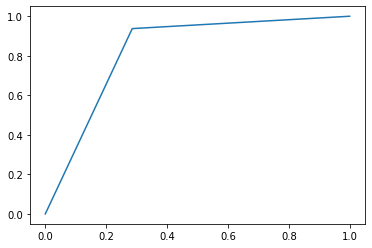

In [46]:
plt.plot(fpr, tpr)

In [44]:
y_

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0])

In [37]:
auc(fpr, tpr)

0.8258928571428571

In [39]:
# 传属于正例的概率
fpr, tpr, threshold = roc_curve(y_test, y_proba[:, 1])
print(fpr, tpr, threshold)

[0.         0.         0.         0.07142857 0.07142857 0.21428571
 0.21428571 0.71428571 0.71428571 1.        ] [0.     0.0625 0.3125 0.3125 0.875  0.875  0.9375 0.9375 1.     1.    ] [1.918481   0.918481   0.86061794 0.84349624 0.68319321 0.62766591
 0.62315096 0.30709991 0.22010143 0.09598429]


In [40]:
np.sort(y_proba[:, 1])

array([0.09598429, 0.15938328, 0.17093211, 0.17658504, 0.22010143,
       0.30709991, 0.31103376, 0.33154584, 0.33288097, 0.35861973,
       0.44362299, 0.58770558, 0.62315096, 0.62766591, 0.65482054,
       0.68319321, 0.70640067, 0.73626218, 0.75946899, 0.76830893,
       0.77558696, 0.79879117, 0.83446944, 0.84023155, 0.84349624,
       0.86061794, 0.8857114 , 0.903016  , 0.90427053, 0.918481  ])

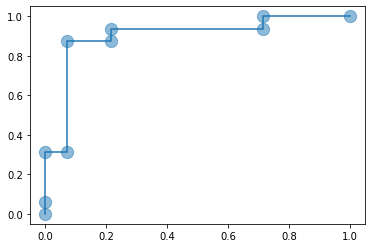

In [42]:
plt.plot(fpr, tpr)
plt.scatter(fpr, tpr, s=150, alpha=0.5)

In [43]:
auc(fpr, tpr)

0.9017857142857143